# 대학생 진로 준비도 검사 통계처리

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import font_manager, rc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [165]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#rc={'font.family': font_name, 'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32, 'xtick.labelsize': 32, 'ytick.labelsize': 32}
fig_size=plt.rcParams["figure.figsize"]
#fig size in inches
fig_size[0]=10
fig_size[1]=8
#sns.set_context("talk", rc=rc)   
#df = pd.read_csv("C:/Users/suer/Dropbox/job/career.csv", engine='python')
xl = pd.ExcelFile("C:/Users/suer/Dropbox/job/career.xlsx")
df = xl.parse('career')
score = {1:5,2:4,3:3,4:2,5:1}
scorecol = df.columns[:-4]
for x in scorecol:
    df[x] = df[x].map(score)

In [166]:
#df['성별'] = df['성별'].map({1:'남학생', 2:'여학생'})

In [167]:
df.head()

,좋아하는일,필요한능력,진로결정,진로도움요청,취업기관방문,능력준비,자신인지,전공인지,진로결정불변,결정회피,...,구인정보확인,임금환경인지,취업도움요청,면접질문대응,결정두려움,이력서작성능력,학과,성별,연령,학년
0,4,4,4.0,4.0,4,4,4,4.0,4,4,...,4,4,4.0,4,4,4,패션의류학과,1,24,4
1,3,3,3.0,5.0,3,3,3,5.0,3,3,...,4,5,4.0,1,4,4,수학교육,2,22,3
2,3,3,1.0,3.0,2,3,2,2.0,1,4,...,4,3,3.0,3,4,3,9999,9999,9999,9999
3,4,4,2.0,4.0,4,4,4,2.0,2,4,...,5,5,3.0,5,4,4,금융보험,1,23,4
4,4,4,4.0,3.0,3,4,5,4.0,4,2,...,3,3,4.0,4,2,2,금융보험,1,24,4


In [168]:
df.shape

(125, 39)

In [169]:
df = df.replace(9999, np.NaN)
df.dropna(axis=0, how='any', inplace=True)

In [170]:
df.describe()

,좋아하는일,필요한능력,진로결정,진로도움요청,취업기관방문,능력준비,자신인지,전공인지,진로결정불변,결정회피,...,타인결정의존,구인정보확인,임금환경인지,취업도움요청,면접질문대응,결정두려움,이력서작성능력,성별,연령,학년
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.850877,3.842105,3.552632,3.859649,3.587719,3.464912,3.719298,3.850877,3.657895,2.929825,...,2.640351,3.324561,3.447368,3.614035,3.289474,2.991228,3.105263,1.570175,21.692982,2.964912
std,0.755305,0.685875,0.912956,0.739256,0.773584,0.864029,0.836224,0.743496,0.985101,1.028095,...,1.057022,0.945372,0.831803,0.722689,0.928637,0.963912,0.802302,0.497237,1.800330,0.808471
min,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,20.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,21.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.750000,2.000000,23.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,28.000000,4.000000


In [171]:
df.mean()

좋아하는일         3.850877
필요한능력         3.842105
진로결정          3.552632
진로도움요청        3.859649
취업기관방문        3.587719
능력준비          3.464912
자신인지          3.719298
전공인지          3.850877
진로결정불변        3.657895
결정회피          2.929825
이력서작성인지       2.903509
장점인지          3.385965
직업전망인지        3.587719
결정후회          2.859649
취업정보문의        3.596491
가치인지          3.868421
관심직업인지        3.842105
진로만족          3.543860
결정경험없음        2.543860
인사담당자문의       3.280702
자기소개서작성능력     3.473684
즐거운일인지        3.771930
진로설명          3.824561
결과두려움         3.043860
어려움도움요청       3.666667
면접자신감         3.412281
전공직업인지        3.473684
진로계획          3.324561
타인결정의존        2.640351
구인정보확인        3.324561
임금환경인지        3.447368
취업도움요청        3.614035
면접질문대응        3.289474
결정두려움         2.991228
이력서작성능력       3.105263
성별            1.570175
연령           21.692982
학년            2.964912
dtype: float64

In [240]:
pd.crosstab([df['성별'],df['학년']], df['진로결정'],normalize='index')

진로결정          2.0       3.0       4.0       5.0
성별  학년                                         
1.0 2.0  0.000000  0.615385  0.307692  0.076923
    3.0  0.428571  0.214286  0.285714  0.071429
    4.0  0.090909  0.181818  0.545455  0.181818
2.0 1.0  0.000000  0.500000  0.500000  0.000000
    2.0  0.150000  0.400000  0.250000  0.200000
    3.0  0.093750  0.375000  0.343750  0.187500
    4.0  0.090909  0.272727  0.454545  0.181818

In [172]:
dfval = df.iloc[:,:-4]

In [173]:
print(dfval.shape, df.shape)

(114, 35) (114, 39)


좋아하는일        0
필요한능력        0
진로결정         0
진로도움요청       0
취업기관방문       0
능력준비         0
자신인지         0
전공인지         0
진로결정불변       0
결정회피         0
이력서작성인지      0
장점인지         0
직업전망인지       0
결정후회         0
취업정보문의       0
가치인지         0
관심직업인지       0
진로만족         0
결정경험없음       0
인사담당자문의      0
자기소개서작성능력    0
즐거운일인지       0
진로설명         0
결과두려움        0
어려움도움요청      0
면접자신감        0
전공직업인지       0
진로계획         0
타인결정의존       0
구인정보확인       0
임금환경인지       0
취업도움요청       0
면접질문대응       0
결정두려움        0
이력서작성능력      0
dtype: int64

In [175]:
colmean = dfval.mean()

In [176]:
meandf = pd.DataFrame({'문항':colmean.index, '평균':colmean.values})

In [177]:
meandf.head()

,문항,평균
0,좋아하는일,3.850877
1,필요한능력,3.842105
2,진로결정,3.552632
3,진로도움요청,3.859649
4,취업기관방문,3.587719


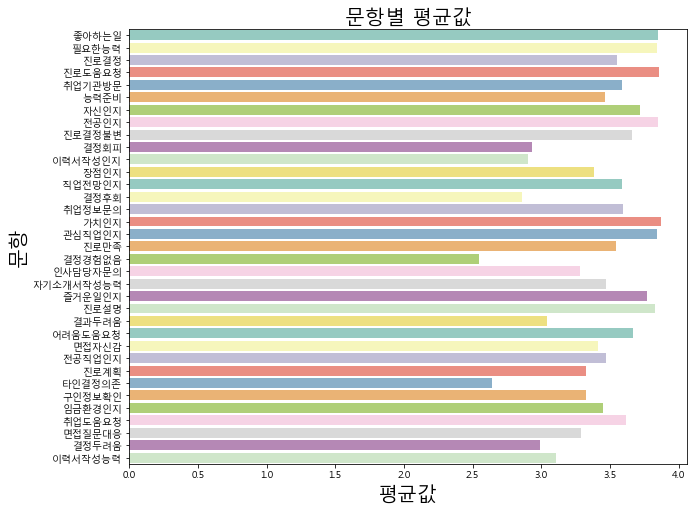

In [178]:
b = sns.barplot(x='평균', y='문항', data= meandf, palette='Set3')
b.axes.set_title("문항별 평균값",fontsize=20)
b.set_xlabel("평균값",fontsize=20)
b.set_ylabel("문항",fontsize=20)
b.tick_params(labelsize=10)

In [179]:
sortedmean = meandf.sort_values(by='평균', ascending=False)

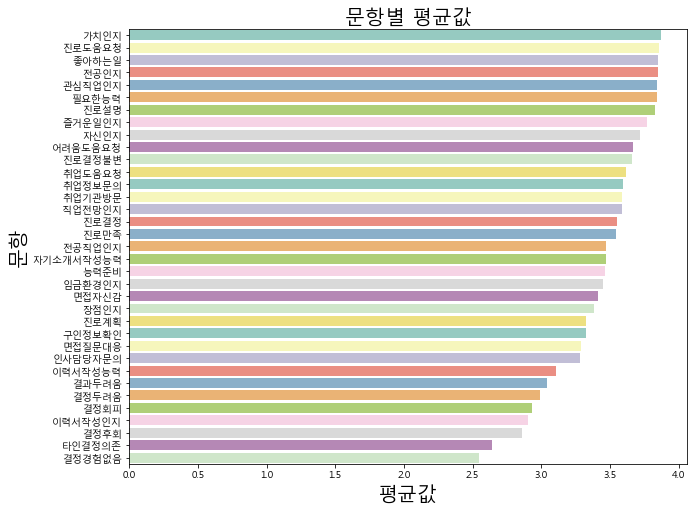

In [180]:
b = sns.barplot(x='평균', y='문항', data= sortedmean, palette='Set3')
b.axes.set_title("문항별 평균값",fontsize=20)
b.set_xlabel("평균값",fontsize=20)
b.set_ylabel("문항",fontsize=20)
b.tick_params(labelsize=10)

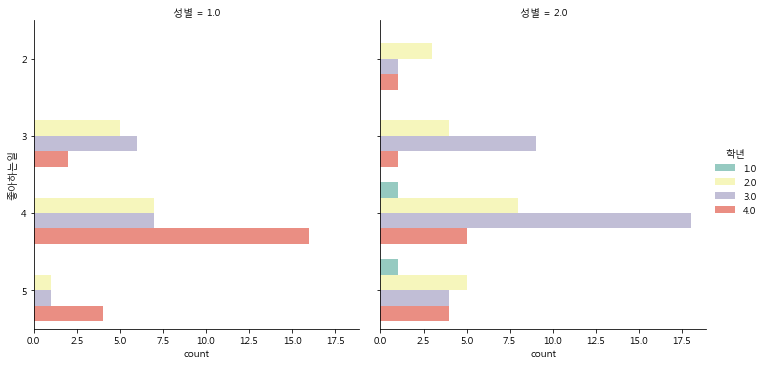

In [181]:
sns.catplot(y='좋아하는일', col='성별', hue='학년', data=df, kind='count', palette='Set3')

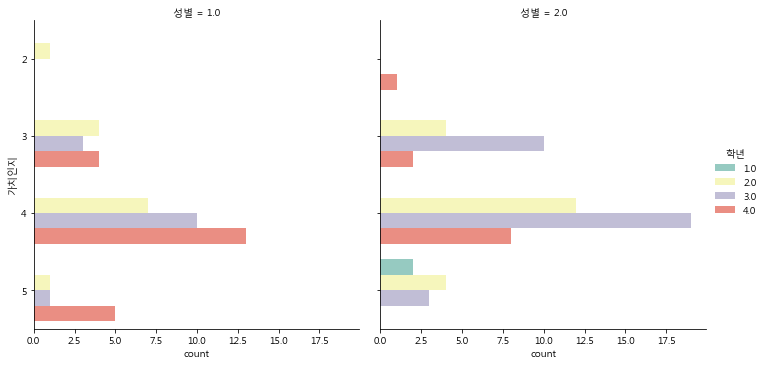

In [182]:
sns.catplot(y='가치인지', col='성별', hue='학년', data=df, kind='count', palette='Set3')

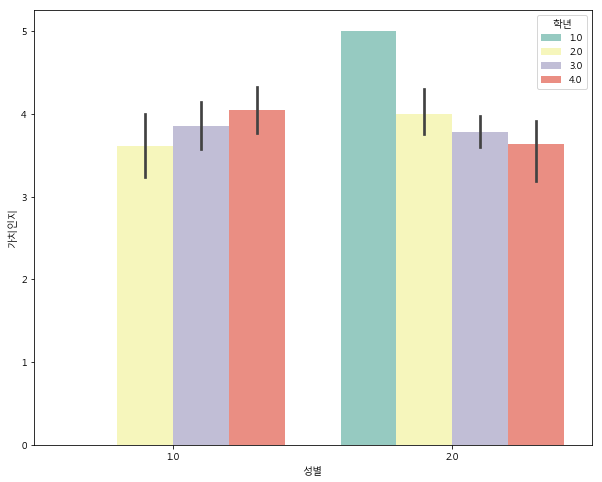

In [183]:
sns.barplot(x='성별',y='가치인지', hue='학년', data=df, palette="Set3")

In [184]:
df.groupby('성별')['가치인지'].mean()

성별
1.0    3.877551
2.0    3.861538
Name: 가치인지, dtype: float64

In [185]:
df.groupby('성별')['가치인지'].count()

성별
1.0    49
2.0    65
Name: 가치인지, dtype: int64

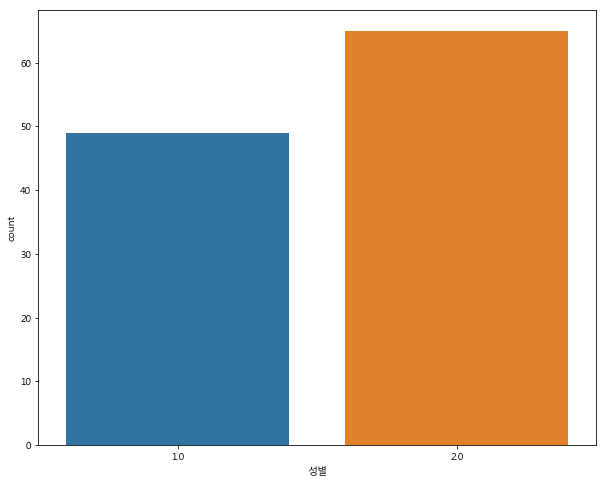

In [186]:
sns.countplot(x='성별', data=df)

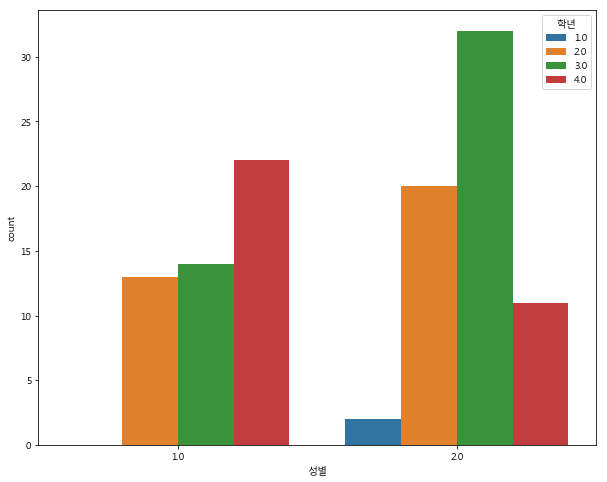

In [187]:
sns.countplot(x='성별', data=df, hue='학년')

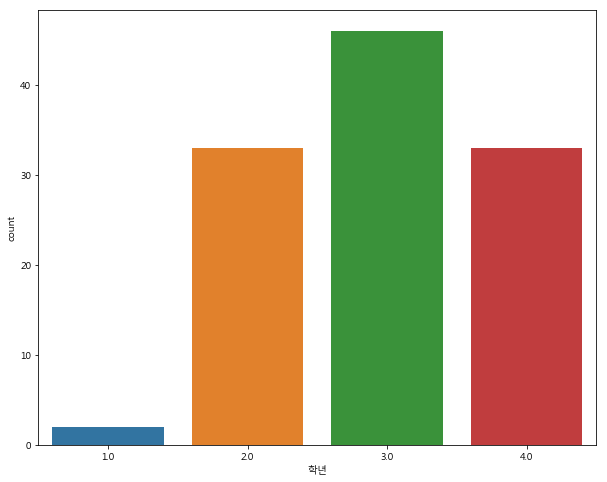

In [188]:
sns.countplot(x='학년', data=df)

In [212]:
df2 = df.drop('학과', axis=1)
X = np.array(dfval.astype(float))

In [213]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.1844715286611145
For n_clusters = 3 The average silhouette_score is : 0.18202041249143122
For n_clusters = 4 The average silhouette_score is : 0.09540778179789083
For n_clusters = 5 The average silhouette_score is : 0.07253943636867749
For n_clusters = 6 The average silhouette_score is : 0.07048991983603065
For n_clusters = 7 The average silhouette_score is : 0.09097553296717507
For n_clusters = 8 The average silhouette_score is : 0.05264909769314288
For n_clusters = 9 The average silhouette_score is : 0.0817934796053819


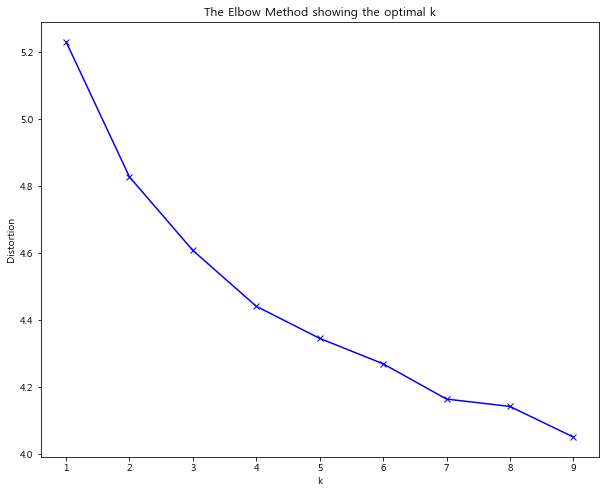

In [191]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X2)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [214]:
clf = KMeans(n_clusters=7)
clf.fit(X)
clf.labels_

array([5, 1, 5, 6, 6, 6, 3, 1, 5, 0, 3, 4, 4, 6, 3, 3, 6, 6, 3, 3, 1, 1,
       5, 5, 3, 3, 3, 1, 6, 4, 4, 1, 6, 3, 4, 1, 3, 2, 3, 1, 6, 0, 3, 6,
       3, 3, 1, 5, 6, 0, 1, 3, 4, 6, 0, 6, 1, 3, 6, 6, 3, 0, 1, 6, 3, 0,
       4, 4, 4, 4, 3, 3, 4, 4, 6, 6, 3, 3, 1, 1, 1, 4, 6, 1, 4, 3, 6, 6,
       4, 3, 3, 1, 1, 3, 2, 1, 1, 2, 6, 6, 3, 0, 5, 3, 5, 0, 6, 1, 2, 6,
       1, 6, 4, 1])

In [215]:
dfval['cluster'] = clf.fit_predict(X)

In [216]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("number of estimated clusters " , n_clusters_)

number of estimated clusters  7


In [217]:
x2 = dfval.values
x2 = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=2)
pca2.fit(x2)
print(pca2.explained_variance_ratio_) 
print(pca2.singular_values_)

[0.27898731 0.09908319]
[33.83731565 20.16525298]


In [218]:
dfval.iloc[:10,35]

0     1
1     6
3     1
4     0
5     0
6     0
8     2
9     1
10    1
11    4
Name: cluster, dtype: int32

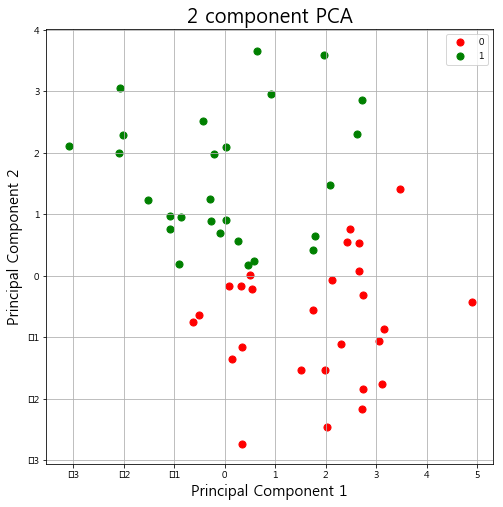

In [219]:
x2 = dfval.values
x2 = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=2)
pCom = pca2.fit_transform(x2)
pDf2 = pd.DataFrame(data = pCom, columns=['Principal Component 1', 'Principal Component 2'])
target = pd.DataFrame(data=dfval.iloc[:,35].values, columns=['target'])
#target = np.rint(target)
fDf2 = pd.concat([pDf2, target], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g']
#targets = [0, 1]
targets = [0, 1, 2, 3, 4, 5, 6]
for target, color in zip(targets,colors):
    indicesToKeep = fDf2['target'] == target
    ax.scatter(fDf2.loc[indicesToKeep, 'Principal Component 1']
               , fDf2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

진로결정          2.0       3.0       4.0       5.0
성별  학년                                         
1.0 2.0  0.000000  0.615385  0.307692  0.076923
    3.0  0.428571  0.214286  0.285714  0.071429
    4.0  0.090909  0.181818  0.545455  0.181818
2.0 1.0  0.000000  0.500000  0.500000  0.000000
    2.0  0.150000  0.400000  0.250000  0.200000
    3.0  0.093750  0.375000  0.343750  0.187500
    4.0  0.090909  0.272727  0.454545  0.181818

In [221]:
pd.crosstab(dfval['cluster'], df['학년'],margins=True)

학년,1.0,2.0,3.0,4.0,All
cluster,,,,,
0,0,6,8,13,27
1,0,9,11,7,27
2,1,7,9,2,19
3,0,2,2,0,4
4,0,2,2,4,8
5,1,0,1,0,2
6,0,7,13,7,27
All,2,33,46,33,114


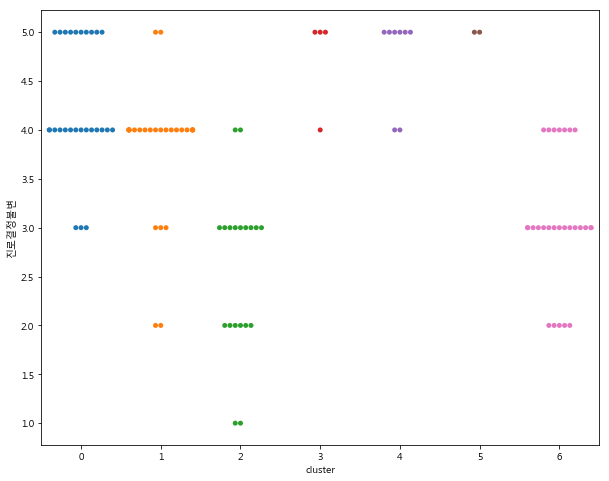

In [223]:
sns.swarmplot(dfval['cluster'],df['진로결정불변'])

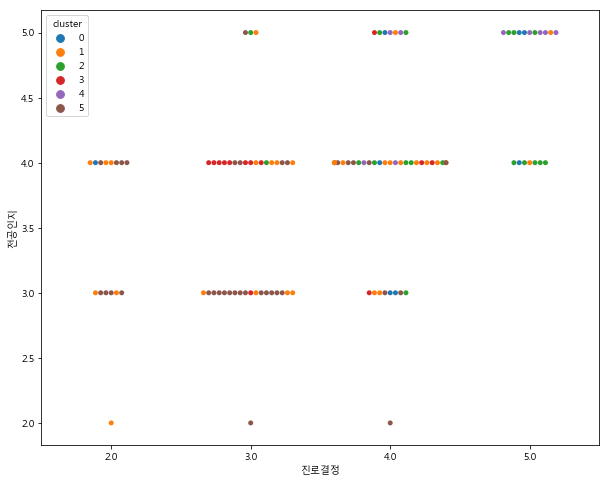

In [224]:
sns.swarmplot('진로결정', '전공인지', data=df, hue='cluster')

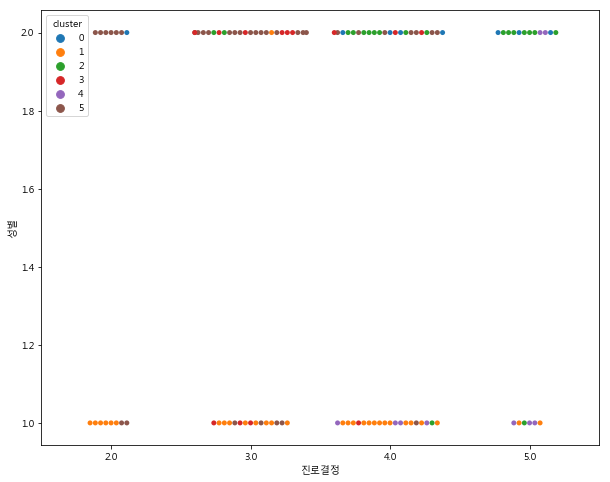

In [225]:
sns.swarmplot('진로결정', '성별', data=df, hue='cluster')

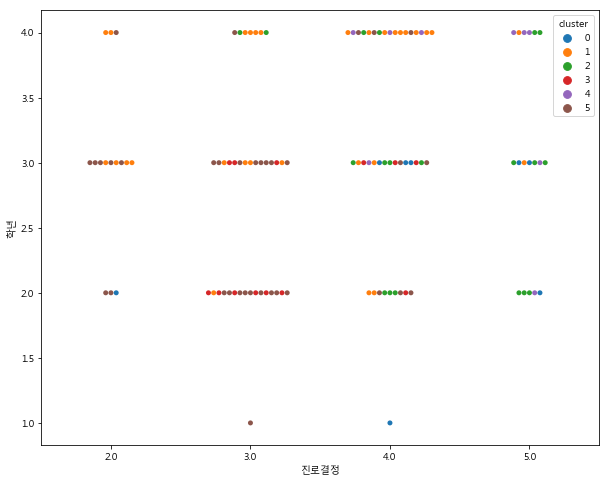

In [226]:
sns.swarmplot('진로결정', '학년', data=df, hue='cluster')

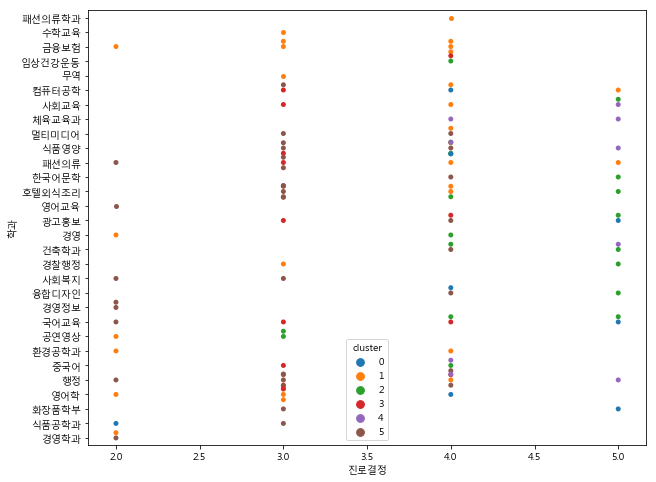

In [227]:
sns.swarmplot('진로결정', '학과', data=df, hue='cluster')

In [228]:
pd.crosstab(df['cluster'],df['학과'], margins=True)

학과,건축학과,경영,경영정보,경영학과,경찰행정,공연영상,광고홍보,국어교육,금융보험,멀티미디어,...,체육교육과,컴퓨터공학,패션의류,패션의류학과,한국어문학,행정,호텔외식조리,화장품학부,환경공학과,All
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,8
1,0,1,0,1,1,1,0,0,6,1,...,0,2,2,1,0,2,2,0,2,30
2,2,1,0,0,1,2,1,2,0,0,...,0,0,0,0,1,0,2,0,0,19
3,0,0,0,0,0,0,2,2,0,0,...,0,1,1,0,0,2,0,0,0,13
4,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,2,0,0,0,9
5,1,0,2,1,0,0,1,1,0,2,...,0,1,3,0,1,6,6,1,0,35
All,4,2,2,2,2,3,5,6,6,3,...,2,5,6,1,2,12,10,2,2,114


In [229]:
df.loc[:,['학과','cluster']]

,학과,cluster
0,패션의류학과,1
1,수학교육,1
3,금융보험,1
4,금융보험,1
5,금융보험,1
6,임상건강운동,2
8,무역,1
9,컴퓨터공학,3
10,사회교육,1
11,체육교육과,4


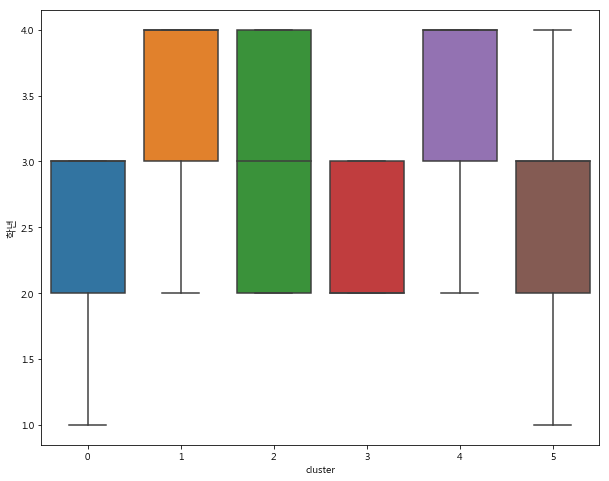

In [230]:
sns.boxplot(df['cluster'],df['학년'])

In [231]:
df.groupby('cluster')['학년','좋아하는일','진로결정','이력서작성능력','능력준비', '이력서작성인지'].agg(['mean', 'std', 'sum'])

학년                      좋아하는일                     진로결정  \
             mean       std    sum      mean       std  sum      mean   
cluster                                                                 
0        2.500000  0.755929   20.0  4.625000  0.517549   37  4.125000   
1        3.433333  0.678911  103.0  3.800000  0.550861  114  3.366667   
2        3.000000  0.816497   57.0  4.421053  0.507257   84  4.315789   
3        2.461538  0.518875   32.0  3.692308  0.630425   48  3.307692   
4        3.555556  0.726483   32.0  4.444444  0.527046   40  4.555556   
5        2.685714  0.758149   94.0  3.314286  0.718308  116  3.000000   

                           이력서작성능력                     능력준비                 \
              std    sum      mean       std  sum      mean       std  sum   
cluster                                                                      
0        0.991031   33.0  3.750000  0.886405   30  4.500000  0.534522   36   
1        0.889918  101.0  2.933333  0.739680   88  3.333333  0.802296  100   
2        0.671038   82.0  3.315789  0.820070   63  3.631579  0.683986   69   
3        0.480384   43.0  3.000000  0.816497   39  3.615385  0.767948   47   
4        0.527046   41.0  3.777778  0.666667   34  4.555556  0.527046   41   
5        0.685994  105.0  2.857143  0.692092  100  2.914286  0.658493  102   

          이력서작성인지                
             mean       std sum  
cluster                          
0        3.875000  0.991031  31  
1        2.766667  0.727932  83  
2        3.210526  0.854982  61  
3        2.384615  0.960769  31  
4        3.555556  0.881917  32  
5        2.657143  0.683540  93

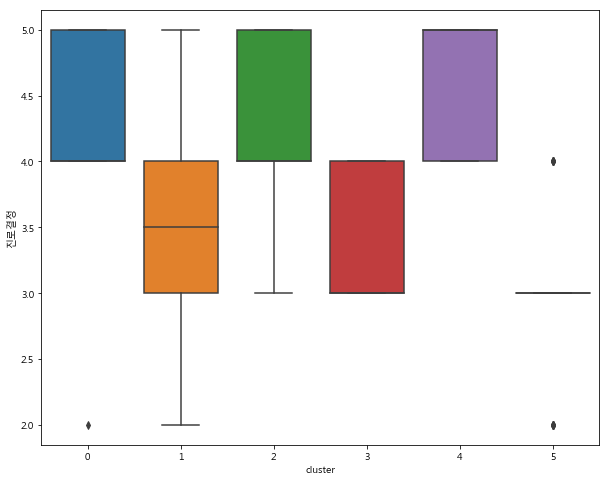

In [232]:
sns.boxplot('cluster', '진로결정',data=df)

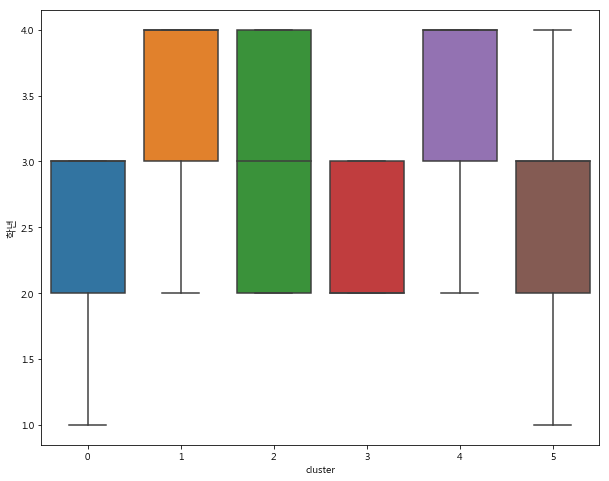

In [233]:
sns.boxplot('cluster', '학년',data=df)

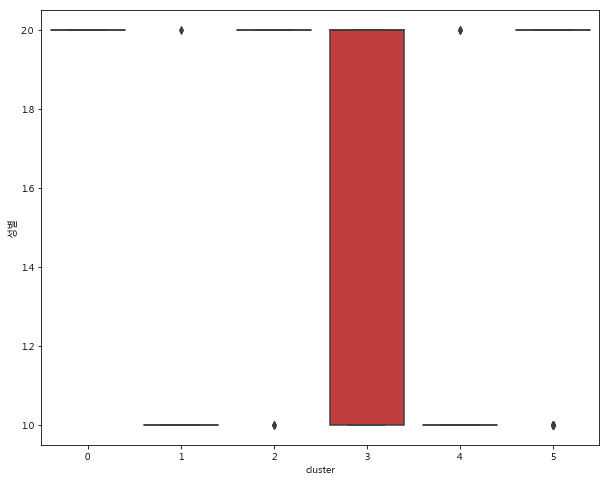

In [234]:
sns.boxplot('cluster', '성별',data=df)

In [235]:
df2 = df.iloc[:,:-4]

In [236]:
corr = df2.corr()

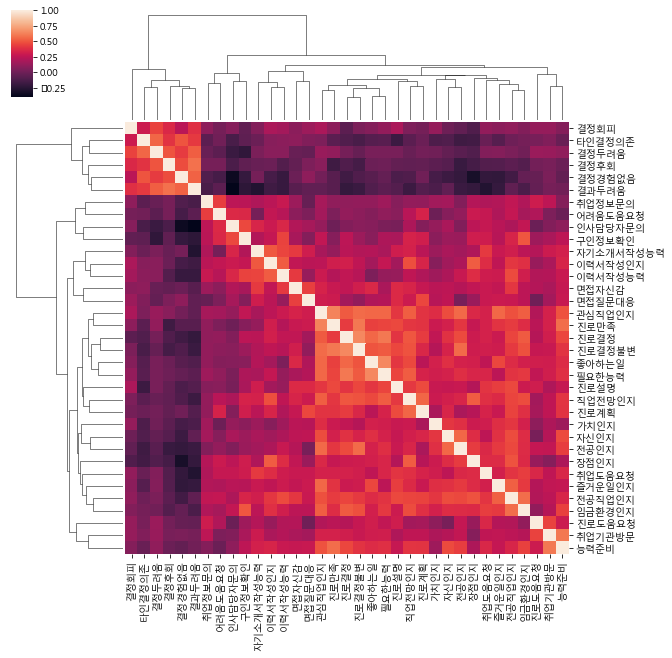

In [237]:
sns.clustermap(corr)

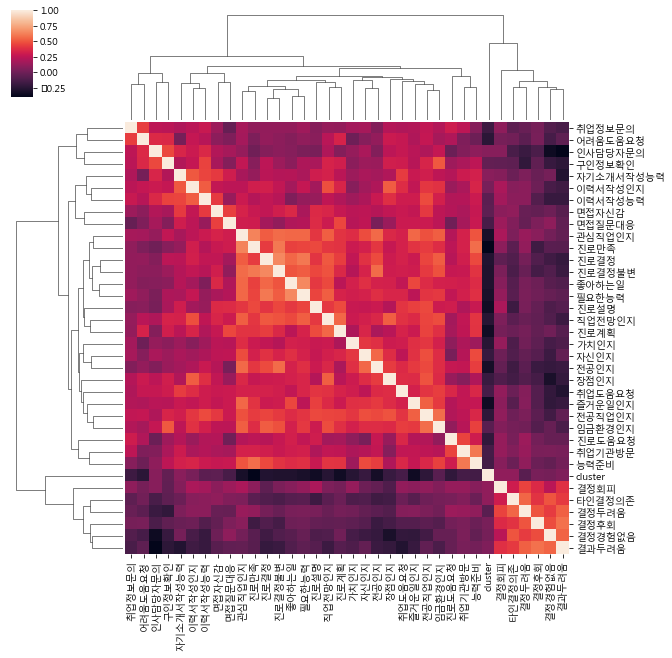

In [239]:
sns.clustermap(dfval.corr())

In [ ]:
#df['학과'] = le.inverse_transform(df['학과'])

In [ ]:
writer = pd.ExcelWriter('career3.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
pwd()